<a href="https://colab.research.google.com/github/SOHEEJOO/AI_02_-/blob/master/N421a_Count_based_Representation_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [1]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [3]:
#3개의 컬럼만 남기기
df= df[['title', 'company', 'description']]

#중복값 제거
df=df.drop_duplicates()

In [4]:
df.head(2)

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...


### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [5]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        757 non-null    object
 1   company      757 non-null    object
 2   description  757 non-null    object
dtypes: object(3)
memory usage: 23.7+ KB


In [7]:
df.head(3)

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...


In [8]:
#소문자로 변경
df['title'] = df['title'].apply(lambda x: x.lower())
df['company'] = df['company'].apply(lambda x: x.lower())
df['description'] = df['description'].apply(lambda x: x.lower())

#알파벳 소문자, 숫자만 받을 수 있는 정규표현식 사용
def tokenize(text):
  reg = r"[^a-z0-9]"
  tokens = re.sub(reg, " ", text)
  tokens = tokens.split()
  return tokens

In [9]:
df['tokens'] = df['description'].apply(tokenize)

In [10]:
df['tokens'].head()

0    [job, details, description, essential, duties,...
2    [as, a, team, member, in, the, finance, and, i...
4    [overview, american, credit, acceptance, seeks...
5    [j, p, morgan, s, corporate, investment, bank,...
6    [at, vystar, we, offer, competitive, pay, an, ...
Name: tokens, dtype: object

### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [11]:
#top10토큰 프린트
from collections import Counter
word_counts = Counter()
df['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(10)

[('and', 22301),
 ('to', 12836),
 ('the', 10639),
 ('of', 8937),
 ('data', 7761),
 ('in', 6883),
 ('a', 6542),
 ('with', 5731),
 ('or', 4223),
 ('for', 4140)]

In [12]:
#토큰 갯수
len(set(word_counts))

13081

In [13]:
#단어 빈도 비율 순위

temp = zip(word_counts.keys(), word_counts.values())

wc = pd.DataFrame(temp, columns=['word', 'counts'])

total = wc['counts'].sum()
wc['percent']= wc['counts'].apply(lambda x: x/total)
wc['rank']=wc['counts'].rank(method='first',ascending=False)

wc = wc.sort_values(by='percent', ascending=False)

##누적비율
wc['cul_percent']=wc['percent'].cumsum()


wc[:10]

,word,counts,percent,rank,cul_percent
5,and,22301,0.055678,1.0,0.055678
16,to,12836,0.032047,2.0,0.087725
11,the,10639,0.026562,3.0,0.114286
100,of,8937,0.022312,4.0,0.136599
26,data,7761,0.019376,5.0,0.155975
79,in,6883,0.017184,6.0,0.173160
105,a,6542,0.016333,7.0,0.189493
37,with,5731,0.014308,8.0,0.203801
88,or,4223,0.010543,9.0,0.214344
270,for,4140,0.010336,10.0,0.224680


In [14]:
#해당 토큰이 존재하는 문서 수와 비율
word_in_docs= Counter()

total_docs = len(df['tokens'])

df['tokens'].apply(lambda x: word_in_docs.update(set(x)))

docs = zip(word_in_docs.keys(), word_in_docs.values())
doc = pd.DataFrame(docs, columns=['word', 'counts'])

doc['percent']= doc['counts'].apply(lambda x:x/total_docs)

doc = doc.sort_values(by='percent', ascending=False)

doc[:10]

,word,counts,percent
100,and,756,0.998679
198,to,754,0.996037
191,in,748,0.988111
78,of,746,0.985469
171,the,745,0.984148
129,with,742,0.980185
106,data,740,0.977543
57,a,739,0.976222
476,for,727,0.960370
28,or,714,0.943197


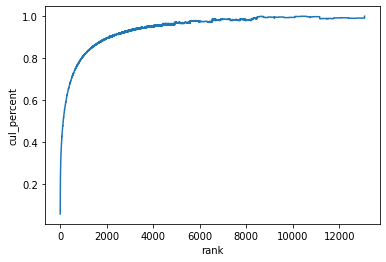

In [15]:
#단어 누적 분포 그래프
import seaborn as sns
sns.lineplot(x='rank', y='cul_percent', data=wc)

In [16]:
!pip install squarify

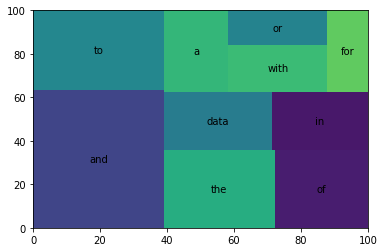

In [17]:
#추천토큰 시각화

import squarify
import matplotlib.pyplot as plt

color=['viridis']

wc_top10 =wc[wc['rank']<=10]
squarify.plot(sizes=wc_top10['percent'], label=wc_top10['word'])
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [18]:
#기존 불용어 사전에 두단어 추가
stop_word = nlp.Defaults.stop_words.union(['data','work'])

In [19]:
def regex(text):
  reg = r"[^a-z0-9]"
  tokens = re.sub(reg," ", text)
  tokens = re.sub('\n',' ', text)
  return tokens

df['description'] = df['description'].apply(regex)

In [20]:
#불용어 제거
tokens=[]

for doc in tokenizer.pipe(df['description']):
  doc_tokens = []
  for token in doc:
    if token.text.lower() not in stop_word:
      doc_tokens.append(token.text.lower())
  tokens.append(doc_tokens)

df['tokens']=tokens
df.tokens.head()

0    [job, details, description, essential, duties,...
2    [team, member, finance, internal, audit, depar...
4    [overview:, american, credit, acceptance, seek...
5    [j.p., morgan's, corporate, &, investment, ban...
6    [vystar,, offer, competitive, pay,, excellent,...
Name: tokens, dtype: object

In [21]:
word_counts = Counter()
df['tokens'].apply(lambda x: word_counts.update(x))

temp = zip(word_counts.keys(), word_counts.values())

wc = pd.DataFrame(temp, columns=['word', 'counts'])

total = wc['counts'].sum()
wc['percent']= wc['counts'].apply(lambda x: x/total)
wc['rank']=wc['counts'].rank(method='first',ascending=False)

wc = wc.sort_values(by='percent', ascending=False)

##누적비율
wc['cul_percent']=wc['percent'].cumsum()


print(wc[:11])

            word  counts   percent  rank  cul_percent
6                   4022  0.016129   1.0     0.016129
183   experience    3055  0.012251   2.0     0.028381
244     business    1885  0.007559   3.0     0.035940
77          team    1323  0.005306   4.0     0.041246
331     learning    1193  0.004784   5.0     0.046030
287      machine    1140  0.004572   6.0     0.050602
650      science    1048  0.004203   7.0     0.054805
143      ability     958  0.003842   8.0     0.058647
85      analysis     896  0.003593   9.0     0.062240
323  statistical     890  0.003569  10.0     0.065809
97        skills     886  0.003553  11.0     0.069362


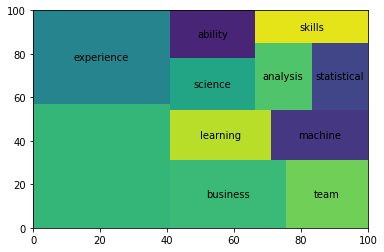

In [22]:

wc_top10_2=wc[wc['rank']<=11]

color=['viridis']
squarify.plot(sizes=wc_top10_2['percent'], label=wc_top10_2['word'])
plt.show()

### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [23]:
nlp.Defaults.stop_words.union(('data','work'))

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'data',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from

In [24]:
def lemmas(text):
  lemmas=[]

  doc = nlp(text)
  for token in doc:
    if ((token.is_stop == False) and (token.is_punct == False)) & (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_)
    

  return lemmas

In [25]:
df['lemmas']=df['description'].apply(lemmas)

In [30]:
df['lemmas'].apply(lambda x: word_counts.update(x))

temp = zip(word_counts.keys(), word_counts.values())

wc = pd.DataFrame(temp, columns=['word', 'counts'])

total = wc['counts'].sum()
wc['percent']= wc['counts'].apply(lambda x: x/total)
wc['rank']=wc['counts'].rank(method='first',ascending=False)

wc = wc.sort_values(by='percent', ascending=False)

##누적비율
wc['cul_percent']=wc['percent'].cumsum()


print(wc[:10])

             word  counts   percent  rank  cul_percent
6                   12066  0.015717   1.0     0.015717
25578       datum   11010  0.014341   2.0     0.030058
183    experience   10387  0.013530   3.0     0.043587
244      business    6271  0.008168   4.0     0.051755
77           team    5995  0.007809   5.0     0.059564
25579        work    5826  0.007589   6.0     0.067153
650       science    4518  0.005885   7.0     0.073038
25580        data    4472  0.005825   8.0     0.078863
85       analysis    4114  0.005359   9.0     0.084221
331      learning    3813  0.004967  10.0     0.089188


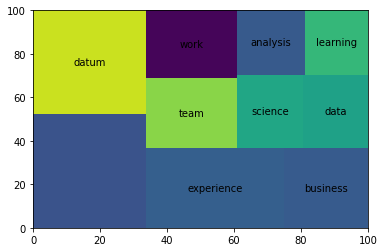

In [31]:
wc_top10_2=wc[wc['rank']<=10]

color=['viridis']
squarify.plot(sizes=wc_top10_2['percent'], label=wc_top10_2['word'])
plt.show()

## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 7) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfi = TfidfVectorizer(stop_words='english',max_features=3000)

dtm = tfi.fit_transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=tfi.get_feature_names())
dtm

,00,000,10,100,11,12,14,15,18,19,20,200,2017,2018,2019,2020,22,24,25,30,300,31,35,3m,40,400,401,401k,50,500,5000,60,600,75,80,90,aa,ab,abilities,ability,...,wellness,whip,wholly,wi,wide,widely,wildlife,willing,willingness,winning,women,word,work,workday,worked,worker,workers,workflow,workflows,workforce,working,workplace,workplaces,works,world,worldwide,wrangling,wri,write,writing,written,www,year,years,yelp,yes,york,yrs,zillow,zulily
0,0.0,0.000000,0.05272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058637,0.052353,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.069356,0.0,0.0,0.000000,0.062315,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.051677,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.023379,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.072438,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031375,0.027418,0.0,0.0,0.000000,0.098541,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.071503,0.000000,0.0,0.000000,0.012252,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.018485,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058743,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.062152,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.058510,0.000000,0.000000,0.017488,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.033337,0.00000,0.035082,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.042929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043708,...,0.000000,0.0,0.0,0.0,0.053924,0.000000,0.0,0.000000,0.038602,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.038116,0.000000,0.000000,0.0,0.030795,0.103499,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060084,0.013012,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.027691,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030387,0.0,0.0,0.0,0.0,0.0,0.0,0.030644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023711,0.010585,...,0.000000,0.0,0.0,0.0,0.019588,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.028417,0.067195,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020896,0.000000,0.0,0.044746,0.000000,0.000000,0.0,0.0,0.0,0.021826,0.000000,0.000000,0.000000,0.047268,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
753,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020719,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.082207,0.0,0.065596,0.0,0.0,0.0,0.0,0.000000,0.000000,0.046606,0.0,0.000000,0.098124,0.05

In [40]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

nn.kneighbors([dtm.iloc[88].values])

(array([[0.        , 1.1283426 , 1.18893646, 1.19442548, 1.19937307]]),
 array([[ 88,  40, 121,  68, 680]]))

## 도전과제🔥 (2가지 중 택 1)
1. 다른 자연어 데이터셋을 이용해서 지금까지 배운 내용을 복습해 봅시다.
2. SpaCy에는 Tokenizing, Lemmatization 이외에도 여러가지 기능을 제공하고 있습니다.<br/>
위에서 사용하지 않았던 Spacy 의 기능을 사용하여 데이터를 분석해봅시다.

In [29]:
### 이곳에서 과제를 진행해 주세요 ### 